<a href="https://colab.research.google.com/github/Seanzhengocean1/Projects/blob/main/Copy_of_train_csv_and_test_RandomForestClassifier_07172023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')


In [ ]:
print(train_data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [ ]:
print(train_data.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


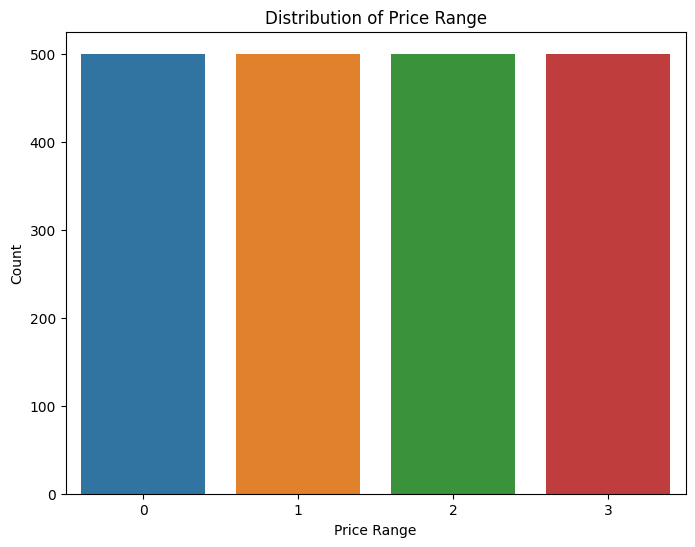

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train_data)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Range')
plt.show()


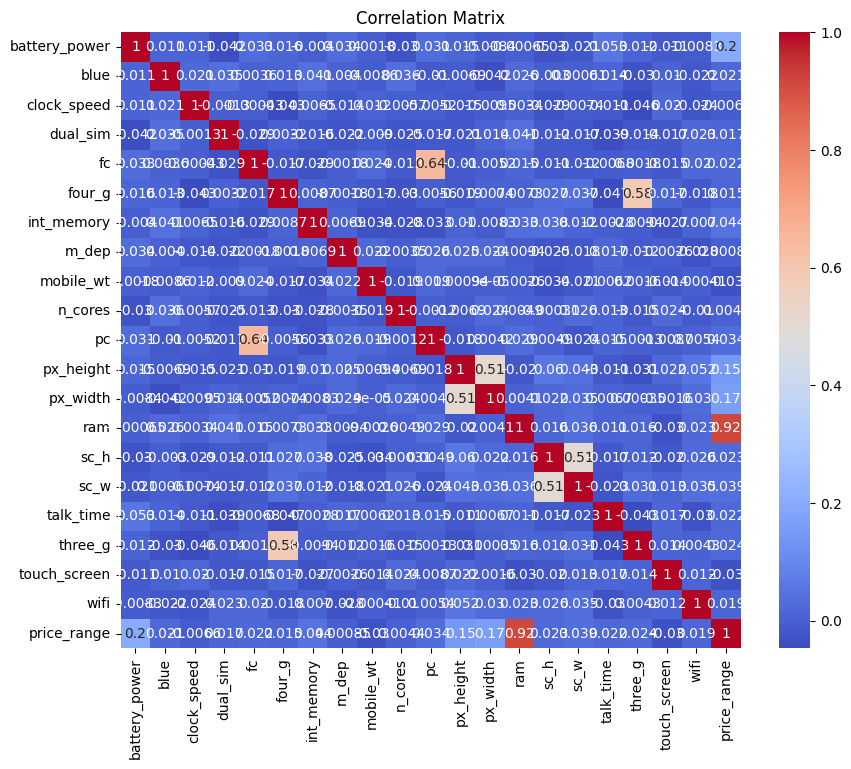

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X_train = train_data.drop('price_range', axis=1)
y_train = train_data['price_range']
X_test = test_data.drop('id', axis=1)

In [ ]:
!pip install scikit-learn

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
test_data = test_data.drop('id', axis=1)

In [ ]:
test_data['predicted_price_range'] = y_pred
test_data.to_csv('test_predictions.csv', index=False)

In [ ]:
# test_data = test_data.drop('id', axis=1)
print(test_data[['predicted_price_range']])

     predicted_price_range
0                        3
1                        3
2                        2
3                        3
4                        1
..                     ...
995                      2
996                      1
997                      0
998                      2
999                      2

[1000 rows x 1 columns]


In [ ]:
print('The predicted price ranges are as follows:')
for i in range(len(test_data)):
    print('Row {}: The predicted price range is {}.'.format(i, test_data.loc[i, 'predicted_price_range']))

print('The price range categories are as follows:')
print('1: Low')
print('2: Medium')
print('3: High')

The predicted price ranges are as follows:
Row 0: The predicted price range is 3.
Row 1: The predicted price range is 3.
Row 2: The predicted price range is 2.
Row 3: The predicted price range is 3.
Row 4: The predicted price range is 1.
Row 5: The predicted price range is 3.
Row 6: The predicted price range is 3.
Row 7: The predicted price range is 1.
Row 8: The predicted price range is 3.
Row 9: The predicted price range is 0.
Row 10: The predicted price range is 3.
Row 11: The predicted price range is 3.
Row 12: The predicted price range is 0.
Row 13: The predicted price range is 0.
Row 14: The predicted price range is 2.
Row 15: The predicted price range is 0.
Row 16: The predicted price range is 2.
Row 17: The predicted price range is 1.
Row 18: The predicted price range is 3.
Row 19: The predicted price range is 2.
Row 20: The predicted price range is 1.
Row 21: The predicted price range is 3.
Row 22: The predicted price range is 1.
Row 23: The predicted price range is 1.
Row 24:

In [ ]:
print('Random Forest Classifier Model has been trained and predictions have been made on the test dataset.')
print('The predicted price ranges for the test dataset have been saved in "test_predictions.csv".')


Random Forest Classifier Model has been trained and predictions have been made on the test dataset.
The predicted price ranges for the test dataset have been saved in "test_predictions.csv".


# Insights from EDA impacting business:
# Phones which are not having 3G don’t have 4G connectivity as well.
# Phones which are not having Primary cam don’t have front cam as well.
# Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.
# Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.
# Very high cost phones have larger battery size & mobile weight is lowest.
